In [1]:
import obspy
import numpy as np
import matplotlib.pyplot as plt
from obspy.io.segy.core import _read_segy

from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical

import pandas as pd


D:\Anaconda3\envs\tensorflow\lib\site-packages\pkg_resources\__init__.py:119: PkgResourcesDeprecationWarning: 3712020b6cb16bc5b932c8b782461bf77c8fea80- is an invalid version and will not be supported in a future release
  PkgResourcesDeprecationWarning,


In [2]:

# 读取Excel文件中的所有工作表
excel_file_path = 'Lithology classification.xlsx'
all_sheets = pd.read_excel(excel_file_path, sheet_name=None)
DATA1=[]
columns_to_extract = ['File','Depth', 'NR','GG','GR','label']

for sheet_name, df in all_sheets.items():
    print(f"Sheet name: {sheet_name}")
    extracted_df = df[columns_to_extract]

Data_all=extracted_df.to_numpy()
Label_all=Data_all[:,-1]
Data_all=Data_all[:,:-1]
Label_all[Label_all==1]=0
Label_all[Label_all==3]=0
Label_all[Label_all==6]=0
Label_all[Label_all==7]=0
Label_all[Label_all==8]=0
Label_all[Label_all==9]=0
Label_all[Label_all==5]=1
Label_all[Label_all==4]=3

Sheet name: Sheet1


(3014,)

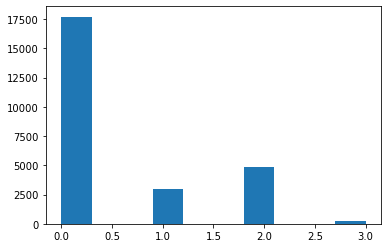

In [3]:
plt.hist(Label_all)
Label_all[Label_all==1].shape

In [4]:


#def normalization_one(data, axis,colinde):
def normalization_one(data, colinde):
    standardized_data=np.copy(data)
    for i in colinde:
        tem=data[:,i]
        minval = np.min(tem)
        maxval = np.max(tem)
        epsilon = 1e-8
        standardized_data[:,i] = (tem - minval) / (maxval - minval + epsilon)
    # 计算均值和标准差
#     minval = np.min(data, axis=axis, keepdims=True)
#     maxval = np.max(data, axis=axis, keepdims=True)
#     #std = np.std(data, axis=axis, keepdims=True)
#     # 防止除以0
#     #std[std == 0] = 1
#     # 标准化
#     epsilon = 1e-8
#     standardized_data = (data - minval) / (maxval - minval + epsilon)

    return standardized_data  


def normalization_(data, axis):
    # 计算均值和标准差
    minval = np.min(data, axis=axis, keepdims=True)
    maxval = np.max(data, axis=axis, keepdims=True)
    # 防止除以0
    #std[std == 0] = 1
    # 标准化
    epsilon = 1e-8
    standardized_data = (data - minval) / (maxval-minval+epsilon)
    return standardized_data  

In [5]:

DATA1=np.load('DATA_lianghe_mulclas.npy',allow_pickle=True)
print(np.unique(DATA1[:,0]))
addfile=[101.,102.,103.,1701.,1702.,1703.,2501.,3301.,3302.]
mask0= np.array([], dtype=int)
for i in range(len(addfile)):
    mask = np.where(DATA1[:, 0] == addfile[i])[0]
    print(addfile[i],len(mask))
    mask0=np.append(mask0,mask)
print(mask0.shape)

#Data_all=np.load('lianghe/Data_all_3curve.npy')
#Data_all=np.load('../../2.28/data_all/Data_all_3curve.npy')

Label_all_=DATA1[mask0,-1]
Data_all_=DATA1[mask0,:-1]
#Label_all_[Label_all_==3]=0
# pick1=np.where(Label_all_==1)[0]
# Label_all_=Label_all_[pick1]
# Data_all_=Data_all_[pick1]

Data_all= np.concatenate((Data_all,Data_all_), axis=0)
Label_all= np.concatenate((Label_all,Label_all_), axis=0)
#Label_all[Label_all==3]=0
# Data_all[:,2]=np.log10(Data_all[:,2]+0.01)
# Data_all[:,3]=np.log10(Data_all[:,3]+0.01)
# Data_all[:,4]=np.log10(Data_all[:,4]+0.01)

[  101.   102.   103.  1701.  1702.  1703.  2501.  3301.  3302.]
101.0 4101
102.0 4301
103.0 4901
1701.0 6776
1702.0 4255
1703.0 4201
2501.0 5201
3301.0 5101
3302.0 6105
(44942,)


(array([  5.49280000e+04,   1.41680000e+04,   1.20700000e+03,
          2.72000000e+02,   9.40000000e+01,   3.50000000e+01,
          1.20000000e+01,   1.10000000e+01,   3.00000000e+00,
          2.60000000e+01]),
 array([    0. ,   105.8,   211.6,   317.4,   423.2,   529. ,   634.8,
          740.6,   846.4,   952.2,  1058. ]),
 <BarContainer object of 10 artists>)

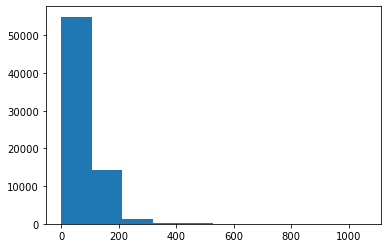

In [6]:
plt.hist(Data_all[:,4])

((70756, 5), (70756,), (4543,))

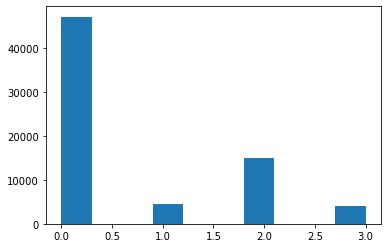

In [7]:
plt.hist(Label_all)

Data_all.shape,Label_all.shape,Label_all[Label_all==1].shape

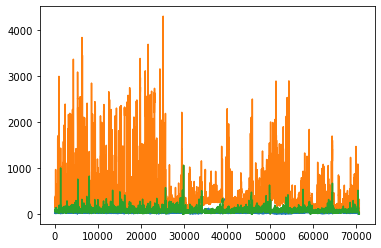

In [8]:

plt.plot(Data_all[:,2])
plt.plot(Data_all[:,3])
plt.plot(Data_all[:,4])
plt.show()

In [23]:
def cutdata(data1,label1):
    data0=[]
    label0=[]
    for i in range(20,len(data1)-20):
        tem=data1[i-20:i+20,:]
        data0.append(tem)
        label0.append(label1[i])
    return np.array(data0),np.array(label0)

fnameunique=np.unique(Data_all[:,0])
print(fnameunique)

DATA0=[]
LABEL0=[]
for i in range(len(fnameunique)):
    print(i,fnameunique[i])
    indexpick=np.where(Data_all[:,0]==fnameunique[i])[0]
    data0=Data_all[indexpick,:]
    label0=Label_all[indexpick]
#     plt.plot(data0[:,2])
#     plt.plot(data0[:,3])
#     plt.plot(data0[:,4])
#     plt.show()
    data1_tem=normalization_one(data0,colinde=[2,3,4])
    data1_tem,label1=cutdata(data1_tem,label0)

    data1,label1=cutdata(data0,label0)
    data1=normalization_(data1,axis=1)
    
    data1=np.concatenate((data1,data1_tem[:,:,2:]), axis=2)
    print(data1.shape,label1.shape)
    DATA0.append(data1[:,:,2:])
    LABEL0.append(label1)

DATA0=np.concatenate(DATA0, axis=0)
LABEL0=np.concatenate(LABEL0, axis=0)

print(DATA0.shape,LABEL0.shape)

LABEL0_onehot = to_categorical(LABEL0, num_classes=4)


[  101.   102.   103.  1701.  1702.  1703.  2501.  3101.  3102.  3301.
  3302.  3401.  3501.  3502.  3601.  3701.  3702.  3801.  3802.  3901.
  4001.  4002.]
0 101.0
(4061, 40, 8) (4061,)
1 102.0
(4261, 40, 8) (4261,)
2 103.0
(4861, 40, 8) (4861,)
3 1701.0
(6736, 40, 8) (6736,)
4 1702.0
(4215, 40, 8) (4215,)
5 1703.0
(4161, 40, 8) (4161,)
6 2501.0
(5161, 40, 8) (5161,)
7 3101.0
(1401, 40, 8) (1401,)
8 3102.0
(1161, 40, 8) (1161,)
9 3301.0
(7782, 40, 8) (7782,)
10 3302.0
(6065, 40, 8) (6065,)
11 3401.0
(1361, 40, 8) (1361,)
12 3501.0
(1261, 40, 8) (1261,)
13 3502.0
(2001, 40, 8) (2001,)
14 3601.0
(1921, 40, 8) (1921,)
15 3701.0
(1341, 40, 8) (1341,)
16 3702.0
(2801, 40, 8) (2801,)
17 3801.0
(2081, 40, 8) (2081,)
18 3802.0
(2001, 40, 8) (2001,)
19 3901.0
(1701, 40, 8) (1701,)
20 4001.0
(1541, 40, 8) (1541,)
21 4002.0
(2001, 40, 8) (2001,)
(69876, 40, 6) (69876,)


In [12]:


# fnameunique=np.unique(Data_all_[:,0])
# print(fnameunique)

# DATA1=[]
# LABEL1=[]
# for i in range(len(fnameunique)):
#     indexpick=np.where(Data_all_[:,0]==fnameunique[i])[0]
#     data0=Data_all_[indexpick,:]
#     label0=Label_all_[indexpick]
# #     plt.plot(data0[:,2])
# #     plt.plot(data0[:,3])
# #     plt.plot(data0[:,4])
# #     plt.show()
#     data1_tem=normalization_one(data0,colinde=[2,3,4])
#     data1_tem,label1=cutdata(data1_tem,label0)

#     data1,label1=cutdata(data0,label0)
#     data1=normalization_(data1,axis=1)
    
#     data1=np.concatenate((data1,data1_tem[:,:,2:]), axis=2)
#     print(data1.shape,label1.shape)
#     DATA1.append(data1[:,:,2:])
#     LABEL1.append(label1)

# DATA1=np.concatenate(DATA1, axis=0)
# LABEL1=np.concatenate(LABEL1, axis=0)

# print(DATA1.shape,LABEL1.shape)

# LABEL1_onehot = to_categorical(LABEL1, num_classes=4)


[3659 3660 3661 3662 3663 3664 3665 3666 3667 3668 3669 3670 3671 3672 3770
 3771 3772 3773 3774 3775]


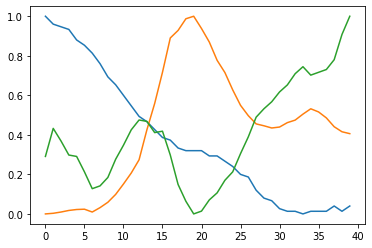

In [13]:
pickindex=np.where(LABEL0==1)[0]
print(pickindex[100:120])
K=260
plt.plot(DATA0[pickindex[K],:,0])
plt.plot(DATA0[pickindex[K],:,1])
plt.plot(DATA0[pickindex[K],:,2])


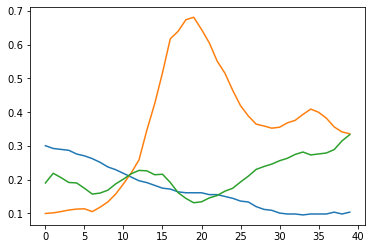

In [14]:
plt.plot(DATA0[pickindex[K],:,3])
plt.plot(DATA0[pickindex[K],:,4])
plt.plot(DATA0[pickindex[K],:,5])


In [30]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Add, BatchNormalization, Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy
from sklearn.utils import class_weight
def build_cnn(input_shape, l2_reg=0.005):
    inputs = Input(shape=input_shape)
    
    # 初始卷积层
    x = Conv1D(filters=16, kernel_size=3, padding='same', kernel_regularizer=l2(l2_reg))(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling1D(pool_size=2)(x)
    
    # 第二卷积层
    x = Conv1D(filters=32, kernel_size=3, padding='same', kernel_regularizer=l2(l2_reg))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling1D(pool_size=2)(x)
    
    # 第三卷积层
    x = Conv1D(filters=32, kernel_size=3, padding='same', kernel_regularizer=l2(l2_reg))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling1D(pool_size=2)(x)
    
    # 平铺层
    x = Flatten()(x)
    
    # 全连接层
    x = Dense(50, activation='relu', kernel_regularizer=l2(l2_reg))(x)
    x = Dropout(0.3)(x)
    
    # 输出层
    outputs = Dense(4, activation='softmax')(x)
    
    # 创建模型
    model = Model(inputs, outputs)
    return model




# 生成示例数据
input_shape = (40, 6)
model = build_cnn(input_shape)
#model = compile_model(model)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 打印模型摘要
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 40, 6)]           0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 40, 16)            304       
_________________________________________________________________
batch_normalization_9 (Batch (None, 40, 16)            64        
_________________________________________________________________
activation_9 (Activation)    (None, 40, 16)            0         
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 20, 16)            0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 20, 32)            1568      
_________________________________________________________________
batch_normalization_10 (Batc (None, 20, 32)            128 

In [31]:
from sklearn.utils import class_weight
# 计算类权重
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(LABEL0), y=LABEL0)
class_weights_dict = dict(enumerate(class_weights))

In [32]:
DATA0.shape,LABEL0.shape
#class_weights_dict = {0: 1.0, 1: 1.0} 
# 训练模型
tf.keras.backend.set_value(model.optimizer.learning_rate, 0.0001)
history = model.fit(
    DATA0[18000:], LABEL0_onehot[18000:],
    epochs=100,
    batch_size=300,
    validation_data=(DATA0[:18000], LABEL0_onehot[:18000]),
    #class_weight=class_weights_dict
)

Train on 51876 samples, validate on 18000 samples
Epoch 1/100
51876/51876 [==============================] - 3s 63us/sample - loss: 1.9112 - accuracy: 0.5060 - val_loss: 1.6155 - val_accuracy: 0.6825
Epoch 2/100
51876/51876 [==============================] - 2s 38us/sample - loss: 1.4280 - accuracy: 0.6886 - val_loss: 1.3616 - val_accuracy: 0.7137
Epoch 3/100
51876/51876 [==============================] - 2s 41us/sample - loss: 1.3190 - accuracy: 0.7136 - val_loss: 1.2520 - val_accuracy: 0.7326
Epoch 4/100
51876/51876 [==============================] - 2s 39us/sample - loss: 1.2472 - accuracy: 0.7293 - val_loss: 1.1877 - val_accuracy: 0.7381
Epoch 5/100
51876/51876 [==============================] - 2s 38us/sample - loss: 1.1868 - accuracy: 0.7398 - val_loss: 1.1382 - val_accuracy: 0.7408
Epoch 6/100
51876/51876 [==============================] - 2s 38us/sample - loss: 1.1317 - accuracy: 0.7512 - val_loss: 1.0982 - val_accuracy: 0.7426
Epoch 7/100
51876/51876 [=========================

Epoch 55/100
51876/51876 [==============================] - 2s 40us/sample - loss: 0.3934 - accuracy: 0.8876 - val_loss: 0.9487 - val_accuracy: 0.7283
Epoch 56/100
51876/51876 [==============================] - 2s 39us/sample - loss: 0.3885 - accuracy: 0.8907 - val_loss: 0.9481 - val_accuracy: 0.7196
Epoch 57/100
51876/51876 [==============================] - 2s 42us/sample - loss: 0.3840 - accuracy: 0.8917 - val_loss: 0.9605 - val_accuracy: 0.7172
Epoch 58/100
51876/51876 [==============================] - 2s 41us/sample - loss: 0.3814 - accuracy: 0.8919 - val_loss: 0.9475 - val_accuracy: 0.7339
Epoch 59/100
51876/51876 [==============================] - 2s 42us/sample - loss: 0.3762 - accuracy: 0.8934 - val_loss: 0.9526 - val_accuracy: 0.7357
Epoch 60/100
51876/51876 [==============================] - 2s 42us/sample - loss: 0.3748 - accuracy: 0.8940 - val_loss: 0.9615 - val_accuracy: 0.7345
Epoch 61/100
51876/51876 [==============================] - 2s 42us/sample - loss: 0.3713 - ac

In [50]:
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
accuracy = np.insert(accuracy, 0, 0.22)
val_accuracy= np.insert(val_accuracy, 0, 0.15)

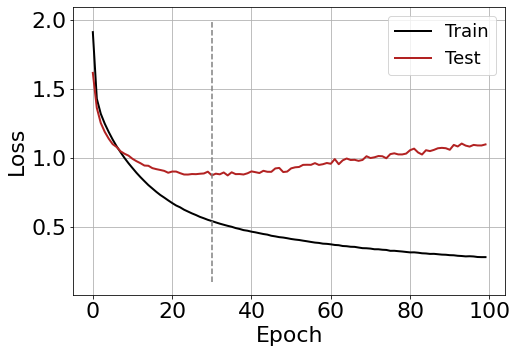

In [56]:

plt.rcParams.update({'font.size': 22}) 
fig, ax1 = plt.subplots(figsize=(7, 5))
plt.grid()
# 绘制第一条曲线
plt.rcParams.update({'font.size': 18}) 
#ax1.plot(data1[:,1], data1[:,2], 'black')
#ax1.plot(data1[:,1], data1[:,3], 'darkred')
plt.plot(loss,label='Train',c='black',linewidth=2)
plt.plot(val_loss,label='Test',c='firebrick',linewidth=2)
plt.plot([30,30],[0.1,2.0],linestyle='--',c='gray')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.subplots_adjust(top=0.95,bottom=0.15,left=0.14,right=0.997)
plt.savefig('loss.png',dpi=500)

(0.0, 1.0)

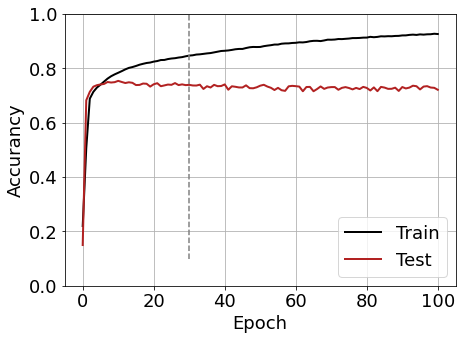

In [55]:
fig, ax1 = plt.subplots(figsize=(7, 5))
plt.grid()
# 绘制第一条曲线
plt.rcParams.update({'font.size': 18}) 
#ax1.plot(data1[:,1], data1[:,2], 'black')
#ax1.plot(data1[:,1], data1[:,3], 'darkred')
plt.plot(accuracy,label='Train',c='black',linewidth=2)
plt.plot(val_accuracy,label='Test',c='firebrick',linewidth=2)
plt.plot([30,30],[0.1,2.0],linestyle='--',c='gray')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accurancy')
plt.savefig('Acc.png',dpi=500)
plt.ylim(0,1)

In [20]:
test_loss, test_accuracy = model.evaluate(DATA0[:1000], LABEL0_onehot[:1000])
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

1000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test Loss: 0.2997
Test Accuracy: 0.9410


(array([ 46693.,      0.,      0.,   4434.,      0.,      0.,  15076.,
             0.,      0.,   3673.]),
 array([ 0. ,  0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ]),
 <BarContainer object of 10 artists>)

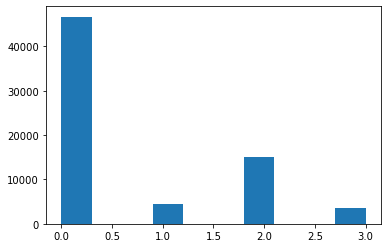

In [73]:
predi=model.predict(DATA0)
predi = np.argmax(predi,axis=1)
plt.hist(predi)


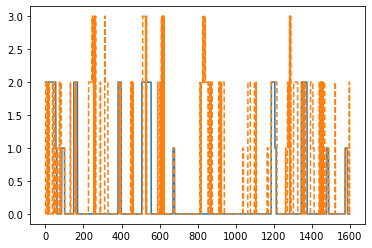

In [21]:
predi=model.predict(DATA0[6400:8000])
predi = np.argmax(predi,axis=1)


plt.plot(LABEL0[6400:8000])
plt.plot(predi,linestyle='--')


In [250]:
np.where(LABEL0==2)[0]

array([ 72216,  72217,  72218, ..., 112385, 112386, 112387], dtype=int64)

In [22]:
model.save_weights('model/CNN7.26_.ckpt')
model.save('model/CNN7.26_.h5')

